## Download Dependency

In [1]:
!python -m wget https://github.com/rkumar-bengaluru/pythonbyexample/raw/main/tensorflow/utilities.py


Saved under utilities (1).py


In [1]:
from utilities import walk_dir,download_file,unzip_file,clean_up

In [2]:
# download data
file_name = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip'
dir_name = file_name.split('/')[-1].split('.')[0]

download_file(file_name)

file already exists 10_food_classes_10_percent.zip


In [3]:
# unzip the data directory
unzip_file(file_name)

In [4]:
# check the data
walk_dir('10_food_classes_10_percent')

there are 2 directories and 0 images in path 10_food_classes_10_percent
there are 10 directories and 0 images in path 10_food_classes_10_percent\test
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\chicken_curry
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\chicken_wings
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\fried_rice
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\grilled_salmon
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\hamburger
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\ice_cream
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\pizza
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\ramen
there are 0 directories and 250 images in path 10_food_classes_10_percent\test\steak
there are 0 directories and 250 images in path 

## Visualize Data

In [5]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def vidualize_data(dir_name):
    train_dir = dir_name + '/' + 'train'
    labels = os.listdir(train_dir)
    images = []
    for label in labels:
        files = os.listdir(train_dir + '/' + label + '/')
        random_file = random.choice(files)
        im = Image.open(train_dir + '/' + label + '/' + random_file)
        im = im.resize((224,224))
        images.append(im)
    fig,axes = plt.subplots(2,5,figsize=(10,5))
    k = 0
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(images[k])
            axes[i][j].set_title(labels[k])
        
            k = k + 1
                

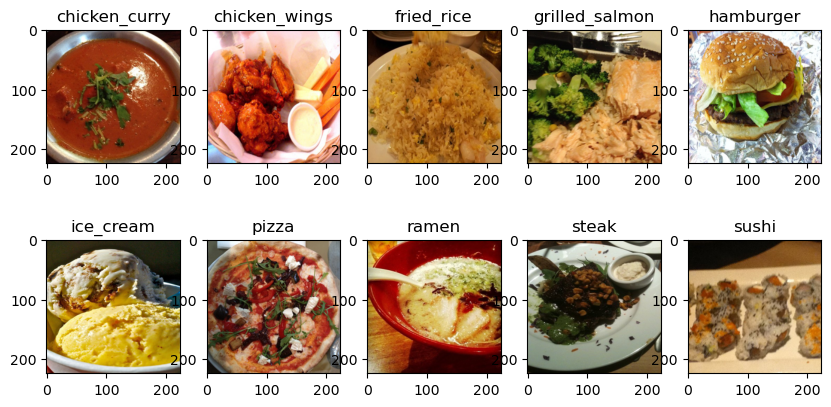

In [6]:
vidualize_data(dir_name)

## Load train and test data

In [7]:
import tensorflow as tf

IMG_SIZE = (224,224)
def create_train_test_data(dir_name):
    train_data = tf.keras.preprocessing.image_dataset_from_directory(dir_name + '/train/',
                                                                     image_size=IMG_SIZE,
                                                                     label_mode='categorical')
    test_data  = tf.keras.preprocessing.image_dataset_from_directory(dir_name + '/test/',
                                                                     image_size=IMG_SIZE,
                                                                    label_mode='categorical')
    return train_data,test_data

In [8]:
train_data,test_data = create_train_test_data(dir_name)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
len(train_data),len(test_data)

(24, 79)

## Mode 0 , Building a transfer learning model using keras functional api

In [81]:
# constants
INPUT_SHAPE = (224,224,3)
SCALE       = 1/255.

# step 1 - create a model with tensorflow applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# step 2 - freeze the base model
base_model.trainablen = False

# step 3 - create inputs in our model
inputs = tf.keras.layers.Input(shape=INPUT_SHAPE,name='input_layer')

# step 4 - if using Resnet50V2 we need rescale.
# x = tf.keras.layers.Rescaling(scale=SCALE)(inputs)

# step 5 - pass the inputs to base model
x = base_model(inputs)
print(f'shape after passing the inputs to base model {x.shape}')

# step 6 - Average Pooling
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'shape after passing through average pool {x.shape}')

# step 7 - create the output layer
outputs = tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

# step 8 - create the model
model0 = tf.keras.Model(inputs,outputs)

shape after passing the inputs to base model (None, 7, 7, 1280)
shape after passing through average pool (None, 1280)


In [83]:
model0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


## Compile and fit the model

In [84]:
model0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [95]:
import datetime

def create_tensor_board_callbacks(dir_name,experiment_name,model_name):
    log_dir = dir_name + '/' + experiment_name + '/' + model_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    print(f'saving tensorboard log file in {log_dir}')
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [92]:
history0 = model0.fit(train_data,epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=int(0.25 *len(test_data)).
                     callbacks=[create_tensor_board_callbacks('transfer_learning',dir_name,'model0')])

Epoch 1/5
18/24 [=====================>........] - ETA: 32s - loss: 1.5008 - accuracy: 0.5139

KeyboardInterrupt: 

## Clean Up

In [6]:
clean_up(file_name)

removing file and directory 10_food_classes_10_percent.zip
directory exists 10_food_classes_10_percent
